In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import random

Graph with 5 nodes and 8 edges


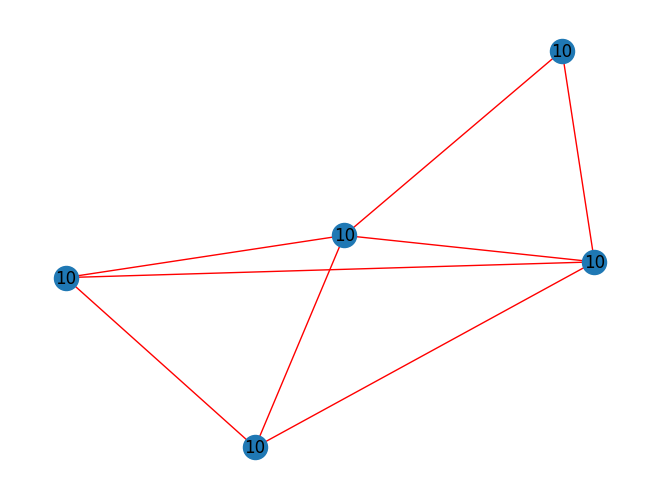

In [2]:
G = nx.Graph()
n = 5
nodes = range(n)
G.add_nodes_from(nodes)
edges = []
for i in range(n):
    for j in range(i+1, n):
        if random.randint(0,1) == 1:
            weight = 1
            edges.append((i,j, random.randint(1,10)))
G.add_weighted_edges_from(edges)
print(G)
edges_with_values = {}
# for edge in edges:
#     edges_with_values[(edge[0], edge[1])] = edge[2]
for i in range(n):
    edges_with_values[i] = 10
nx.draw(G, with_labels=True, edge_color = "red", labels = edges_with_values)
plt.show()